In [44]:
import numpy as np
import random
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [47]:
df = pd.read_csv("student_performance_modified.csv")
df.head(5)

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,10


In [48]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [49]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### The goal is to  build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

<AxesSubplot:xlabel='underperformance', ylabel='count'>

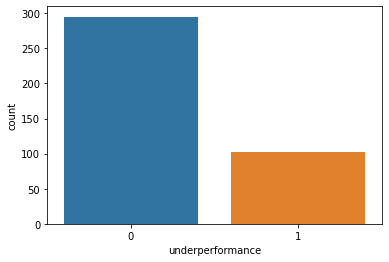

In [50]:
sns.countplot(df['underperformance'])

# Checking for any missing values

In [51]:

df.shape


(397, 27)

In [52]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

In [53]:
df.dropna(inplace=True)
df.shape


(396, 27)

In [54]:
df.isnull().any()

age                 False
traveltime          False
studytime           False
failures            False
absences            False
Math_G1             False
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

# Removing Outliers

<AxesSubplot:xlabel='age'>

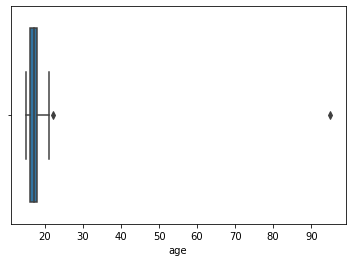

In [55]:
sns.boxplot(x=df['age'])


<AxesSubplot:xlabel='age'>

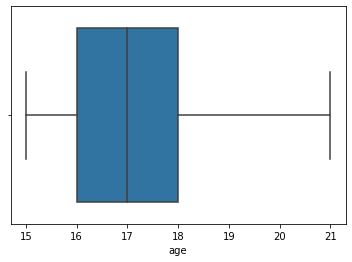

In [56]:
df=df[df.age <22]
sns.boxplot(x=df['age'])



<AxesSubplot:xlabel='traveltime'>

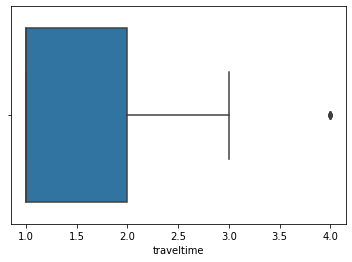

In [57]:
sns.boxplot(x=df['traveltime'])



<AxesSubplot:xlabel='traveltime'>

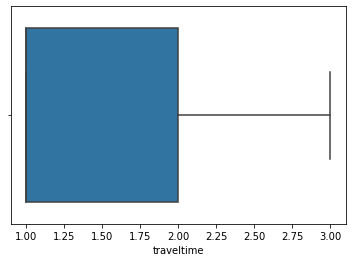

In [58]:
df=df[df.traveltime <4]
sns.boxplot(x=df['traveltime'])

<AxesSubplot:xlabel='studytime'>

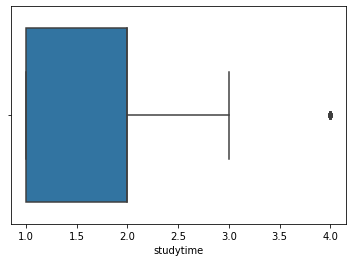

In [59]:
sns.boxplot(x=df['studytime'])


<AxesSubplot:xlabel='absences'>

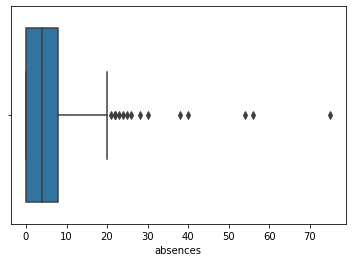

In [60]:
sns.boxplot(x=df['absences'])


<AxesSubplot:xlabel='absences'>

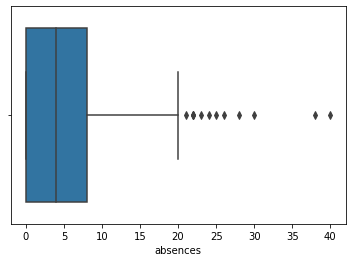

In [61]:
df=df[df.absences <50]
sns.boxplot(x=df['absences'])

# Relationship Between variables

In [62]:
df_relationship=df[['failures','absences','Math_G1','Language_G1','famrel','Walc','age','traveltime','studytime']]

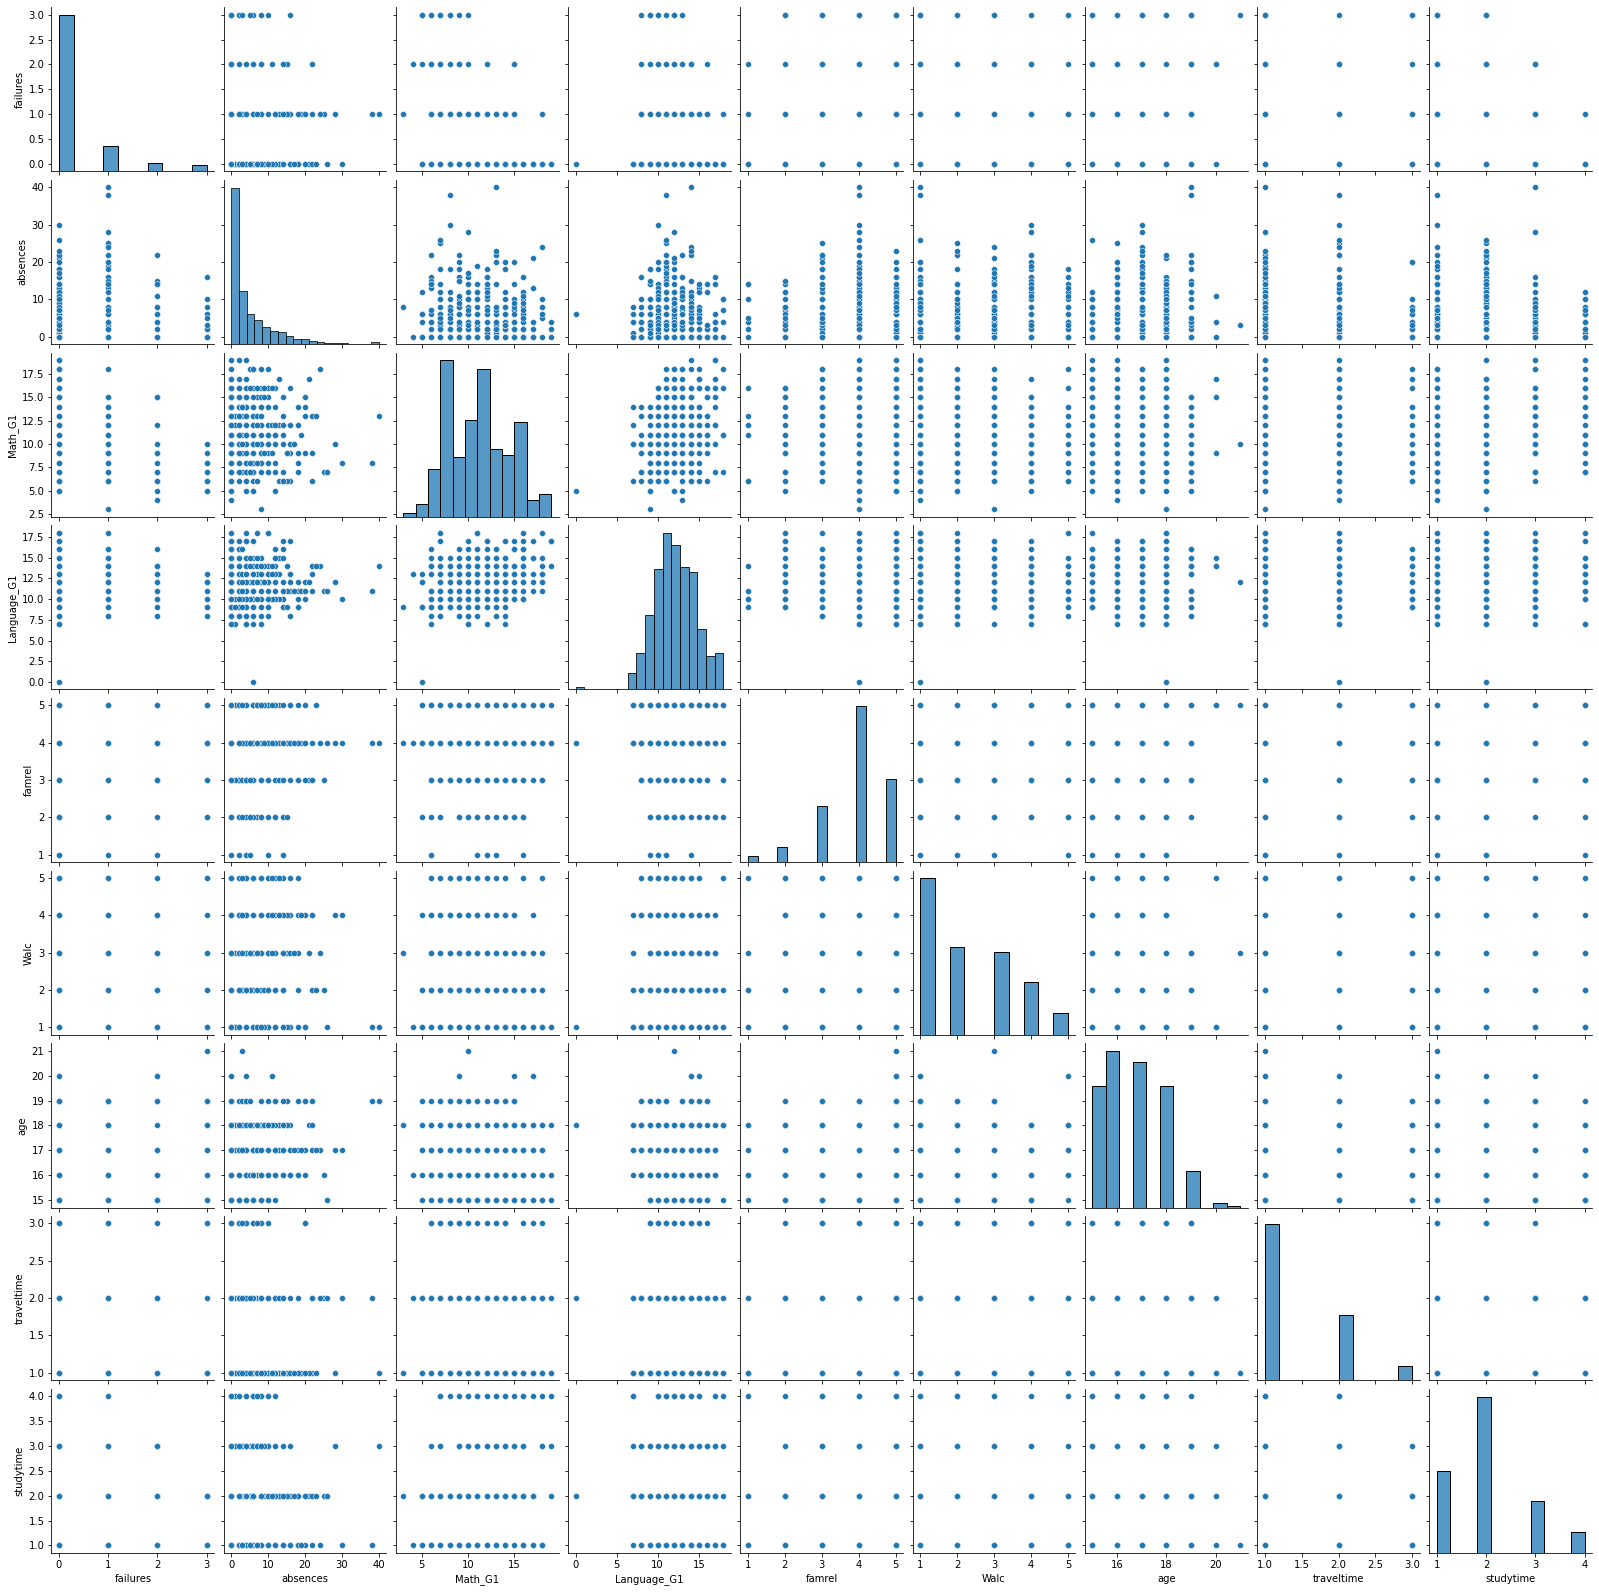

In [63]:
sns.pairplot(df_relationship)

In [64]:
df.groupby('underperformance').mean()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,famrel,freetime,Dalc,Walc,health
underperformance,,,,,,,,,,,,,,
0,16.596491,1.364912,2.080702,0.182456,5.245614,12.221053,12.235088,2.842105,2.614035,3.968421,3.217544,1.435088,2.224561,3.508772
1,16.948980,1.489796,1.918367,0.724490,5.336735,7.336735,11.265306,2.530612,2.316327,3.846939,3.275510,1.469388,2.295918,3.673469


# This is just to see how big the gap between the variable is when compared to underperformance so you Could see Math_G1is 12.221 to 7.3367 ,Language_G1 is 12.235 to 11.265306 and failures is .18 to .72 so the ratio between them is higher compare to other variables which means they have agreater impact on underperformance variable

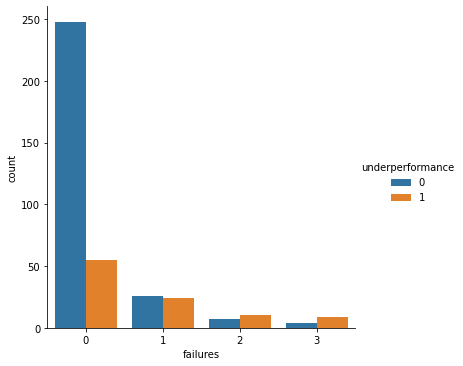

In [65]:

sns.factorplot('failures',kind='count', hue='underperformance',data=df)

# We coulde see The higher the failures the higher the underperformance

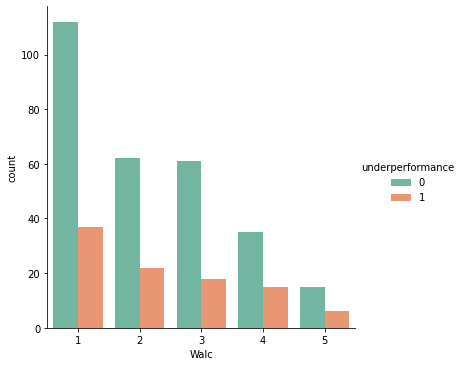

In [66]:
sns.factorplot('Walc',kind='count', hue='underperformance',data=df,palette='Set2')

# Again the higher the alchool consumption the higher the underperformance , they are correleated

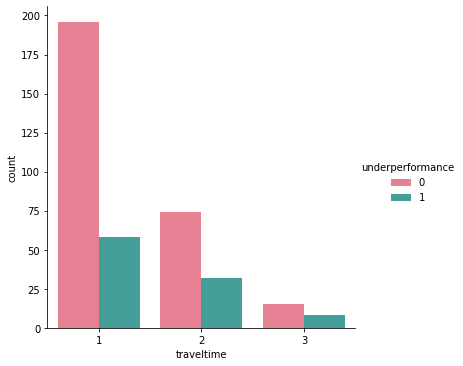

In [67]:
sns.factorplot('traveltime',kind='count', hue='underperformance',data=df,palette='husl')

# Again we see that higher traveltime means they are more likely to underperform

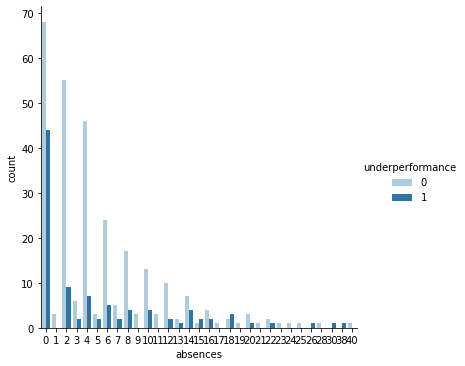

In [68]:
sns.factorplot('absences',kind='count', hue='underperformance',data=df,palette='Paired')

# We see that the more absence some one is they are more liekly to perform bad

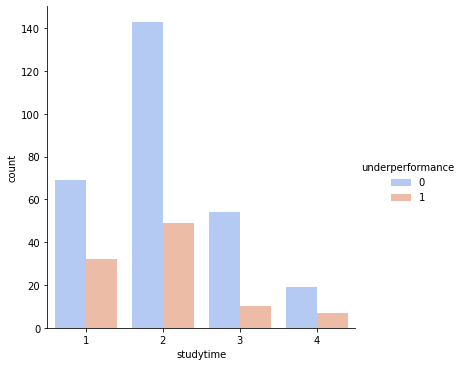

In [69]:
sns.factorplot('studytime',kind='count', hue='underperformance',data=df,palette='coolwarm')


# We see that studytime also has decent correlation with underperformance the more you study more likely you will do well but compared to other variables  this variables correlation is less

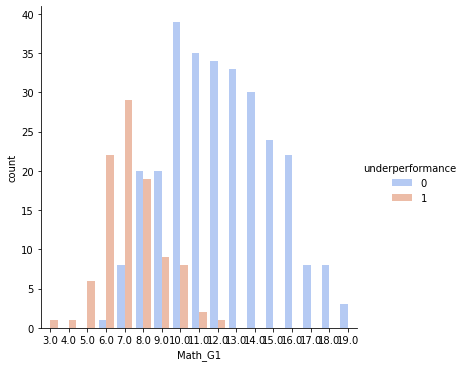

In [70]:
sns.factorplot('Math_G1',kind='count', hue='underperformance',data=df,palette='coolwarm')

# We could see the Math_G1 has a big correlation with underperformance.If you do bad on Math_G1 then you will most likely underperform


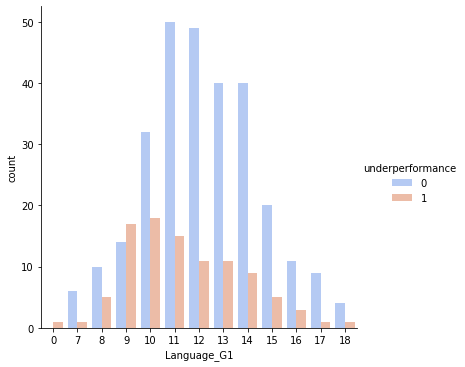

In [71]:
sns.factorplot('Language_G1',kind='count', hue='underperformance',data=df,palette='coolwarm')

# We could see that language_G1 has a decent corelation with underperformance if you perform well on the language_G1 you are liekly to perform better on the math Final

In [72]:
firstset= df[['failures','Walc','traveltime','studytime', 'underperformance']]




 We are going to use all of these variables from above to train and  test

# Some of the dummy variables below

In [73]:
internet = pd.get_dummies(df['internet'],drop_first=True)
support = pd.get_dummies(df['famsup'],drop_first=True)

higher_edu = pd.get_dummies(df['higher'],drop_first=True)
school_support = pd.get_dummies(df['schoolsup'],drop_first=True)


In [74]:
df1=pd.concat([firstset,internet,support,higher_edu,school_support], axis=1)
df1.head()

,failures,Walc,traveltime,studytime,underperformance,yes,yes,yes,yes
0,0,1,2,2,1,0,0,1,1
1,0,1,1,2,1,1,1,1,0
2,3,3,1,2,0,1,0,1,1
3,0,1,1,3,0,1,1,1,0
4,0,2,1,2,0,0,1,1,0


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('underperformance',axis=1), 
                                                    df1['underperformance'], test_size=0.20, 
                                                    random_state=101)
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        64
           1       0.40      0.15      0.22        13

    accuracy                           0.82        77
   macro avg       0.62      0.55      0.56        77
weighted avg       0.77      0.82      0.78        77

0.8181818181818182


# So for this model we didn't include Math_G1 and Language_G1 and included all the other variables from above and based on the result we see that  we had an accuracy of about 81% with f1 score being .22 and recall value of.15

In [76]:
accuracy = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('underperformance',axis=1), 
                                                    df1['underperformance'], test_size=0.20, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    print('Accuracy_Score for Trial {},  {}'.format(i,accuracy[i]))


Accuracy_Score for Trial 0,  0.7272727272727273
Accuracy_Score for Trial 1,  0.7142857142857143
Accuracy_Score for Trial 2,  0.8051948051948052
Accuracy_Score for Trial 3,  0.7402597402597403
Accuracy_Score for Trial 4,  0.7792207792207793
Accuracy_Score for Trial 5,  0.7792207792207793
Accuracy_Score for Trial 6,  0.6883116883116883
Accuracy_Score for Trial 7,  0.7532467532467533
Accuracy_Score for Trial 8,  0.7402597402597403
Accuracy_Score for Trial 9,  0.7012987012987013


# The cross validation here looks pretty consistent with the Acurracy of our model, but not that perfect

In [77]:
secondset = df[['failures','Walc','traveltime','studytime','underperformance','Math_G1']]


df2=pd.concat([secondset,internet,support,higher_edu,school_support], axis=1)
df2.tail()

,failures,Walc,traveltime,studytime,underperformance,Math_G1,yes,yes,yes,yes
391,2,5,1,2,0,9.0,0,1,1,0
392,0,4,2,1,0,14.0,1,0,1,0
393,3,3,1,1,1,10.0,0,0,1,0
394,0,4,3,1,0,11.0,1,0,1,0
396,0,3,1,1,0,8.0,1,0,1,0


In [78]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df2.drop('underperformance',axis=1), 
                                                    df2['underperformance'], test_size=0.20, 
                                                    random_state=101)
model2 = LogisticRegression(solver='liblinear')
model2.fit(X2_train,Y2_train)
predictions2 = model2.predict(X2_test)
print(classification_report(Y2_test,predictions2))
print(accuracy_score(Y2_test, predictions2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        64
           1       0.69      0.69      0.69        13

    accuracy                           0.90        77
   macro avg       0.81      0.81      0.81        77
weighted avg       0.90      0.90      0.90        77

0.8961038961038961


# Here after adding the Math_G1 variable we see a significant improvent on the accuracy score which is about 89%.Also the f1 score is about .69 and recall is .69 as well so a great improvement overall after adding the Math_G1 variable

In [79]:


accuracy2 = []

for i in range(10):
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(df2.drop('underperformance',axis=1), 
                                                    df2['underperformance'], test_size=0.20, random_state = random.randint(1,1000))
    model2 = LogisticRegression(solver='liblinear')
    model2.fit(X2_train, Y2_train)
    Y2_pred = model2.predict(X2_test)
    accuracy2.append(metrics.accuracy_score(Y2_test, Y2_pred))
    print('Accuracy_Score for Trial {},  {}'.format(i,accuracy2[i]))


Accuracy_Score for Trial 0,  0.8961038961038961
Accuracy_Score for Trial 1,  0.8571428571428571
Accuracy_Score for Trial 2,  0.8961038961038961
Accuracy_Score for Trial 3,  0.8831168831168831
Accuracy_Score for Trial 4,  0.8571428571428571
Accuracy_Score for Trial 5,  0.8441558441558441
Accuracy_Score for Trial 6,  0.8701298701298701
Accuracy_Score for Trial 7,  0.8571428571428571
Accuracy_Score for Trial 8,  0.8441558441558441
Accuracy_Score for Trial 9,  0.8701298701298701


# The cross valiadtion is close to the accuracy score so we  could say it is somehwat consistent

In [80]:
thirdset = df[['failures','Walc','traveltime','Math_G1','studytime','Language_G1','underperformance']]

df3=pd.concat([thirdset,internet,support,higher_edu,school_support], axis=1)
df3.tail()

,failures,Walc,traveltime,Math_G1,studytime,Language_G1,underperformance,yes,yes,yes,yes
391,2,5,1,9.0,2,14,0,0,1,1,0
392,0,4,2,14.0,1,11,0,1,0,1,0
393,3,3,1,10.0,1,12,1,0,0,1,0
394,0,4,3,11.0,1,14,0,1,0,1,0
396,0,3,1,8.0,1,14,0,1,0,1,0


In [81]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(df3.drop('underperformance',axis=1), 
                                                    df3['underperformance'], test_size=0.20, 
                                                    random_state=101)
model3 = LogisticRegression(solver='liblinear')
model3.fit(X3_train,Y3_train)
predictions3 = model3.predict(X3_test)
print(classification_report(Y3_test,predictions3))
print(accuracy_score(Y3_test, predictions3))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.62      0.77      0.69        13

    accuracy                           0.88        77
   macro avg       0.79      0.84      0.81        77
weighted avg       0.90      0.88      0.89        77

0.8831168831168831


# After the addition of Language_G1 variable with the Math_G1 variable the accurecy score dropped a little bit.The reason could be that we are clustering too many variabales in a model but the f1 score remains same and the recall went up to .77.So we can conclude that this is almost good as our 2nd model with high accurecy score,f1 score and recall.

In [82]:


accuracy3 = []

for i in range(10):
    X3_train, X3_test, Y3_train, Y3_test = train_test_split(df3.drop('underperformance',axis=1), 
                                                    df3['underperformance'], test_size=0.20, random_state = random.randint(1,1000))
    model3 = LogisticRegression(solver='liblinear')
    model3.fit(X3_train, Y3_train)
    Y3_pred = model3.predict(X3_test)
    accuracy3.append(metrics.accuracy_score(Y3_test, Y3_pred))
    print('Accuracy_Score for Trial {},  {}'.format(i,accuracy3[i]))

Accuracy_Score for Trial 0,  0.8831168831168831
Accuracy_Score for Trial 1,  0.8571428571428571
Accuracy_Score for Trial 2,  0.935064935064935
Accuracy_Score for Trial 3,  0.8441558441558441
Accuracy_Score for Trial 4,  0.8441558441558441
Accuracy_Score for Trial 5,  0.9090909090909091
Accuracy_Score for Trial 6,  0.8571428571428571
Accuracy_Score for Trial 7,  0.8571428571428571
Accuracy_Score for Trial 8,  0.8831168831168831
Accuracy_Score for Trial 9,  0.8961038961038961


# The cross validation again looks pretty good and somewhat matches with the accuracy but there is a little difference.

# Overall we could say that Math_G1 variable has strong correlation with underperformance so if the Math_G1 is great then the final Math exam performance would be great too .Language_g1 will have some impact on the performance but not as the way Math_G1 would